In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [18]:
dt=pd.read_csv('/content/DOGE-USD.csv')
dt

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-13,0.000127,0.000129,0.000123,0.000126,0.000126,4.088900e+04
1,2015-09-14,0.000125,0.000126,0.000122,0.000125,0.000125,6.118900e+04
2,2015-09-15,0.000125,0.000131,0.000123,0.000126,0.000126,4.333200e+04
3,2015-09-16,0.000126,0.000126,0.000122,0.000124,0.000124,6.032300e+04
4,2015-09-17,0.000124,0.000126,0.000122,0.000125,0.000125,6.051200e+04
...,...,...,...,...,...,...,...
2188,2021-09-09,0.250362,0.259558,0.249270,0.252596,0.252596,1.763184e+09
2189,2021-09-10,0.252585,0.261622,0.235909,0.239982,0.239982,1.840816e+09
2190,2021-09-11,0.239826,0.248018,0.238487,0.241432,0.241432,1.196338e+09
2191,2021-09-12,0.241329,0.254794,0.239233,0.250617,0.250617,1.419289e+09


In [19]:
dt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-13,0.000127,0.000129,0.000123,0.000126,0.000126,40889.0
1,2015-09-14,0.000125,0.000126,0.000122,0.000125,0.000125,61189.0
2,2015-09-15,0.000125,0.000131,0.000123,0.000126,0.000126,43332.0
3,2015-09-16,0.000126,0.000126,0.000122,0.000124,0.000124,60323.0
4,2015-09-17,0.000124,0.000126,0.000122,0.000125,0.000125,60512.0


In [20]:
dt=dt[["Close"]]
dt.fillna(method="ffill", inplace=True)
scaler=MinMaxScaler()
dt=scaler.fit_transform(dt)

<ipython-input-20-d9fb14df8218>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt.fillna(method="ffill", inplace=True)


In [21]:
train_len= int(len(dt) * 0.8)
train, test= dt[0:train_len], dt[train_len:]
def seqcreate(dt, look_back=1):
  X,Y = [],[]
  for i in range(len(dt) - look_back - 1):
    X.append(dt[i:(i+look_back), 0])
    Y.append(dt[i+look_back, 0])
  return np.array(X), np.array(Y)

look_back = 1
X_train, Y_train = seqcreate(train, look_back)
X_test, Y_test = seqcreate(test, look_back)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")




In [22]:
model.fit(X_train,Y_train, epochs=150, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/150
55/55 [==============================] - 6s 22ms/step - loss: 8.8652e-06 - val_loss: 0.0751
Epoch 2/150
55/55 [==============================] - 0s 6ms/step - loss: 8.8160e-06 - val_loss: 0.0738
Epoch 3/150
55/55 [==============================] - 0s 7ms/step - loss: 8.6847e-06 - val_loss: 0.0712
Epoch 4/150
55/55 [==============================] - 0s 6ms/step - loss: 8.4847e-06 - val_loss: 0.0702
Epoch 5/150
55/55 [==============================] - 0s 7ms/step - loss: 8.1847e-06 - val_loss: 0.0670
Epoch 6/150
55/55 [==============================] - 0s 7ms/step - loss: 7.3969e-06 - val_loss: 0.0625
Epoch 7/150
55/55 [==============================] - 1s 10ms/step - loss: 6.6289e-06 - val_loss: 0.0553
Epoch 8/150
55/55 [==============================] - 1s 10ms/step - loss: 5.7429e-06 - val_loss: 0.0443
Epoch 9/150
55/55 [==============================] - 1s 10ms/step - loss: 4.0882e-06 - val_loss: 0.0280
Epoch 10/150
55/55 [==============================] - 1s 10ms/step - 

14/14 [==============================] - 1s 4ms/step


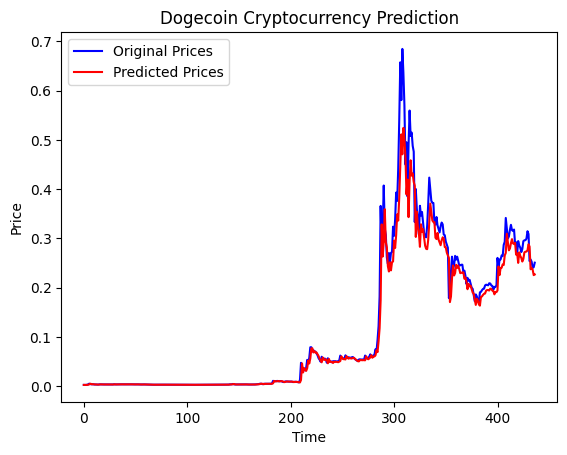

In [23]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
origprices = scaler.inverse_transform(Y_test.reshape(-1,1))
plt.plot(origprices, label= 'Original Prices', color='blue')
plt.plot(predictions, label= 'Predicted Prices', color='red')

plt.title('Dogecoin Cryptocurrency Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [24]:
rmse = np.sqrt(np.mean((predictions - Y_test) ** 2))
mae = np.mean(abs(predictions - Y_test))
print("RMSE is:", rmse)
print("MAE is:", mae)

RMSE is: 0.26154837912767415
MAE is: 0.18589479200105086
